In [1]:
import os
import pandas as pd, numpy as np

In [2]:
os.chdir('/Users/jun/GitStudy/Data_4/Data')
os.getcwd()

'/Users/jun/GitStudy/Data_4/Data'

In [3]:
eComFeb = pd.read_csv("/Users/jun/GitStudy/Data_4/Data/eCommerce/2020-Feb.csv")

In [4]:
eComFeb.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb


In [5]:
eComFeb.describe()

,product_id,category_id,price,user_id
count,4.156682e+06,4.156682e+06,4.156682e+06,4.156682e+06
mean,5.504270e+06,1.562416e+18,8.525847e+00,5.450008e+08
std,1.281809e+06,1.797695e+17,1.958040e+01,8.955674e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,2.038666e+06
25%,5.733046e+06,1.487580e+18,2.050000e+00,5.084226e+08
50%,5.814703e+06,1.487580e+18,4.110000e+00,5.797951e+08
75%,5.864791e+06,1.487580e+18,6.980000e+00,6.104701e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [6]:
import seaborn as sns, matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
import seaborn as sns
plt.rc('font', family='NanumGothicOTF') # For MacOS



In [7]:
# NULL 값 개수와 비율을 하나의 데이터프레임으로 통합
null_summary = pd.DataFrame({
    'Data Type' : eComFeb.dtypes,
    'NULL Count': eComFeb.isnull().sum(),
    'NULL Percentage': eComFeb.isnull().mean() * 100
})

print(null_summary)


              Data Type  NULL Count  NULL Percentage
event_time       object           0         0.000000
event_type       object           0         0.000000
product_id        int64           0         0.000000
category_id       int64           0         0.000000
category_code    object     4079497        98.143110
brand            object     1825908        43.927055
price           float64           0         0.000000
user_id           int64           0         0.000000
user_session     object        1055         0.025381


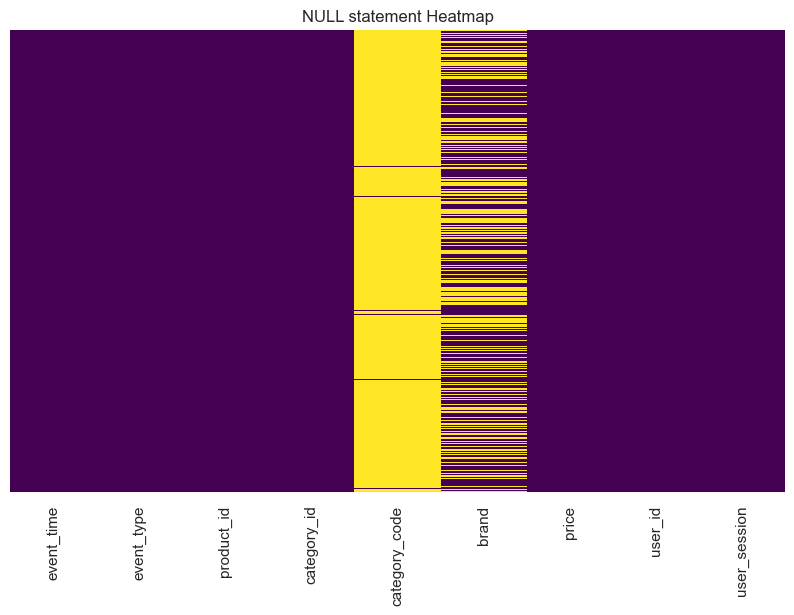

In [8]:
# 시각화를 위한 스타일 설정
sns.set(style="white")

# NULL 값 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(eComFeb.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('NULL statement Heatmap')
plt.show()


In [37]:
# category_code와 brand 컬럼의 결측값을 채우기
columns_to_fill = ['category_code', 'brand']

for column in columns_to_fill:
    # 각 product_id 그룹에서 첫 번째 비결측값을 가져옵니다
    mapping = eComFeb.groupby('product_id')[column].first().dropna()
    
    # 결측값을 채웁니다
    eComFeb[column] = eComFeb[column].fillna(eComFeb['product_id'].map(mapping))

print(eComFeb)

                      event_time event_type  product_id          category_id  \
0        2020-02-01 00:00:01 UTC       cart     5844305  1487580006317032337   
1        2020-02-01 00:00:03 UTC       view     5769925  1487580013841613016   
2        2020-02-01 00:00:08 UTC       view     5817765  1487580008246412266   
3        2020-02-01 00:00:11 UTC       view     5877033  1487580010100293687   
4        2020-02-01 00:00:12 UTC       cart     5814871  1487580008112194531   
...                          ...        ...         ...                  ...   
4156677  2020-02-29 23:59:32 UTC       view     5885416  1487580005092295511   
4156678  2020-02-29 23:59:39 UTC       cart     5550686  1487580008145748965   
4156679  2020-02-29 23:59:45 UTC       view     5850628  1602943681873052386   
4156680  2020-02-29 23:59:54 UTC       view     5716351  1487580010872045658   
4156681  2020-02-29 23:59:59 UTC       view     5927709  1487580013950664926   

        category_code    brand  price  

In [38]:
# NULL 값 개수와 비율을 하나의 데이터프레임으로 통합
null_summary = pd.DataFrame({
    'Data Type' : eComFeb.dtypes,
    'NULL Count': eComFeb.isnull().sum(),
    'NULL Percentage': eComFeb.isnull().mean() * 100
})

print(null_summary)


              Data Type  NULL Count  NULL Percentage
event_time       object           0         0.000000
event_type       object           0         0.000000
product_id        int64           0         0.000000
category_id       int64           0         0.000000
category_code    object     4079497        98.143110
brand            object     1787261        42.997299
price           float64           0         0.000000
user_id           int64           0         0.000000
user_session     object        1055         0.025381


In [36]:
eComFeb[eComFeb['brand'].notnull() ].head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb
11,2020-02-01 00:00:34 UTC,view,5877036,1487580010100293687,NaN,milv,3.49,564814969,e9f1f268-6eb2-4f1a-9818-6d64136ea7d5


In [34]:
eComFeb[eComFeb['brand'] == 'kapous'].head(15)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
43,2020-02-01 00:02:16 UTC,view,5823667,1487580008246412266,NaN,kapous,4.98,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
69,2020-02-01 00:04:41 UTC,view,5769877,1487580013841613016,NaN,kapous,3.65,608822762,71250188-fa9f-427a-a307-1d5db96339b9
306,2020-02-01 00:21:13 UTC,view,5770053,1487580013841613016,NaN,kapous,2.81,608824844,98f56406-cbb8-46cd-9abf-a2571f75e4be
405,2020-02-01 00:27:27 UTC,view,5769893,1487580013841613016,NaN,kapous,3.65,608825646,1ee6cf11-40eb-4731-bf4c-34845c2e316d
672,2020-02-01 00:42:56 UTC,view,5770053,1487580013841613016,NaN,kapous,2.81,530878673,5dbed973-549f-4c83-a93a-596efa2d7a8a
755,2020-02-01 00:48:43 UTC,view,5808547,1487580008313521133,NaN,kapous,3.81,475203304,6cfa5b1b-2135-41fe-9654-57a379316d91
761,2020-02-01 00:48:52 UTC,view,5770042,1487580013841613016,NaN,kapous,2.81,608828298,6835396e-76f3-4841-a1e4-b497cac49874
780,2020-02-01 00:49:48 UTC,view,5803082,1487580013858390233,NaN,kapous,3.49,608825376,d562b070-fba6-41e6-9522-062f2fa2c28f
783,2020-02-01 00:50:00 UTC,view,5769914,1487580013841613016,NaN,kapous,3.65,604715337,9790fc77-9a21-4f14-a195-8220f369a148


In [30]:
# 'kapous' 브랜드의 category_id 리스트 추출 및 문자열로 변환
kapous_category_ids = eComFeb[eComFeb['brand'] == 'kapous']['category_id'].dropna().astype(str).tolist()

In [31]:
def longest_common_prefix(strs):
    if not strs:
        return ""
    
    # 가장 짧은 문자열을 기준으로 접두사를 찾습니다.
    shortest_str = min(strs, key=len)
    
    for i in range(len(shortest_str)):
        char = shortest_str[i]
        for other in strs:
            if other[i] != char:
                return shortest_str[:i]
    return shortest_str

common_prefix = longest_common_prefix(kapous_category_ids)
print(f"\nkapous 브랜드의 category_id 공통 접두사: {common_prefix}")



kapous 브랜드의 category_id 공통 접두사: 1


In [42]:
eComFeb['event_time']  = pd.to_datetime(eComFeb['event_time'])
purchases = eComFeb[eComFeb['event_type'] == 'purchase']
purchase_counts_by_hour = purchases.groupby(purchases['event_time'].dt.hour).size()

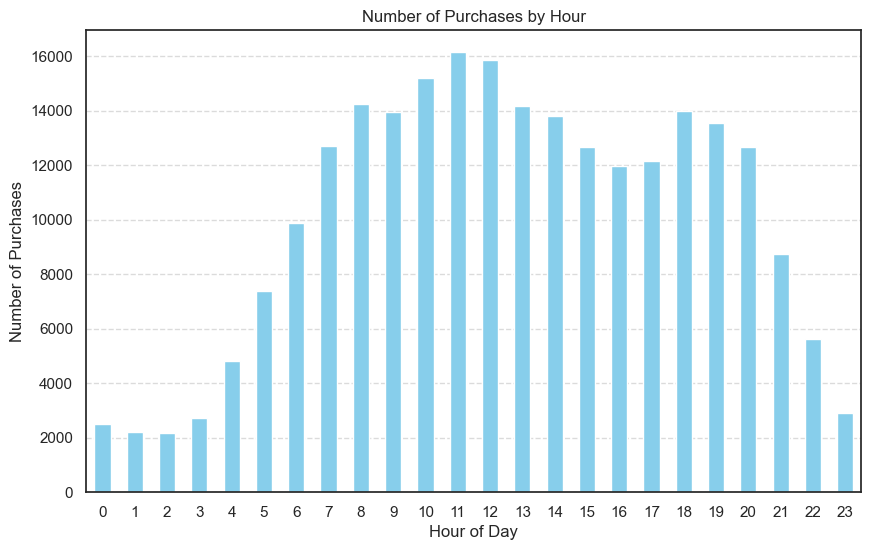

In [43]:
plt.figure(figsize=(10, 6))
purchase_counts_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)  # x축 레이블 수평으로
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

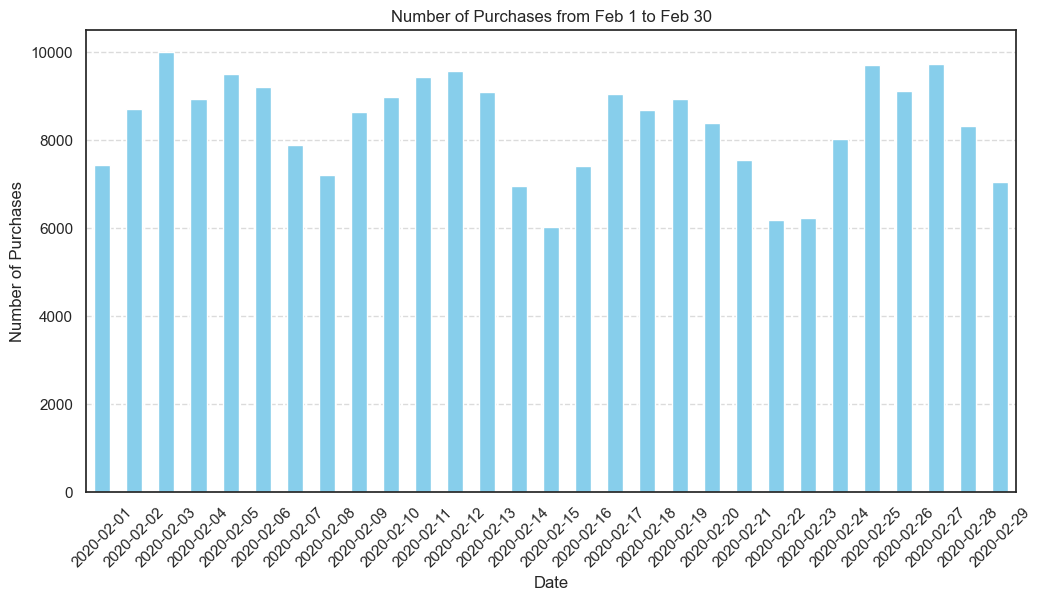

In [44]:
# 1. 'purchase'인 행 필터링
purchases = eComFeb[eComFeb['event_type'] == 'purchase']

# 2. 날짜별로 그룹화하고 개수 계산
purchase_counts_by_date = purchases.groupby(purchases['event_time'].dt.date).size()

# 3. 시각화
plt.figure(figsize=(12, 6))
purchase_counts_by_date.plot(kind='bar', color='skyblue')
plt.title('Number of Purchases from Feb 1 to Feb 30')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)  # x축 레이블을 45도로 기울임
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:
print(purchase_counts_by_hour)

event_time
0      2510
1      2197
2      2189
3      2721
4      4826
5      7370
6      9869
7     12686
8     14250
9     13963
10    15183
11    16139
12    15868
13    14179
14    13811
15    12665
16    11958
17    12163
18    13972
19    13545
20    12651
21     8726
22     5639
23     2913
dtype: int64


In [ ]:
# 시각화를 위한 스타일 설정
sns.set(style="white")

# NULL 값 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(eComFeb.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Sales count per day')
plt.show()

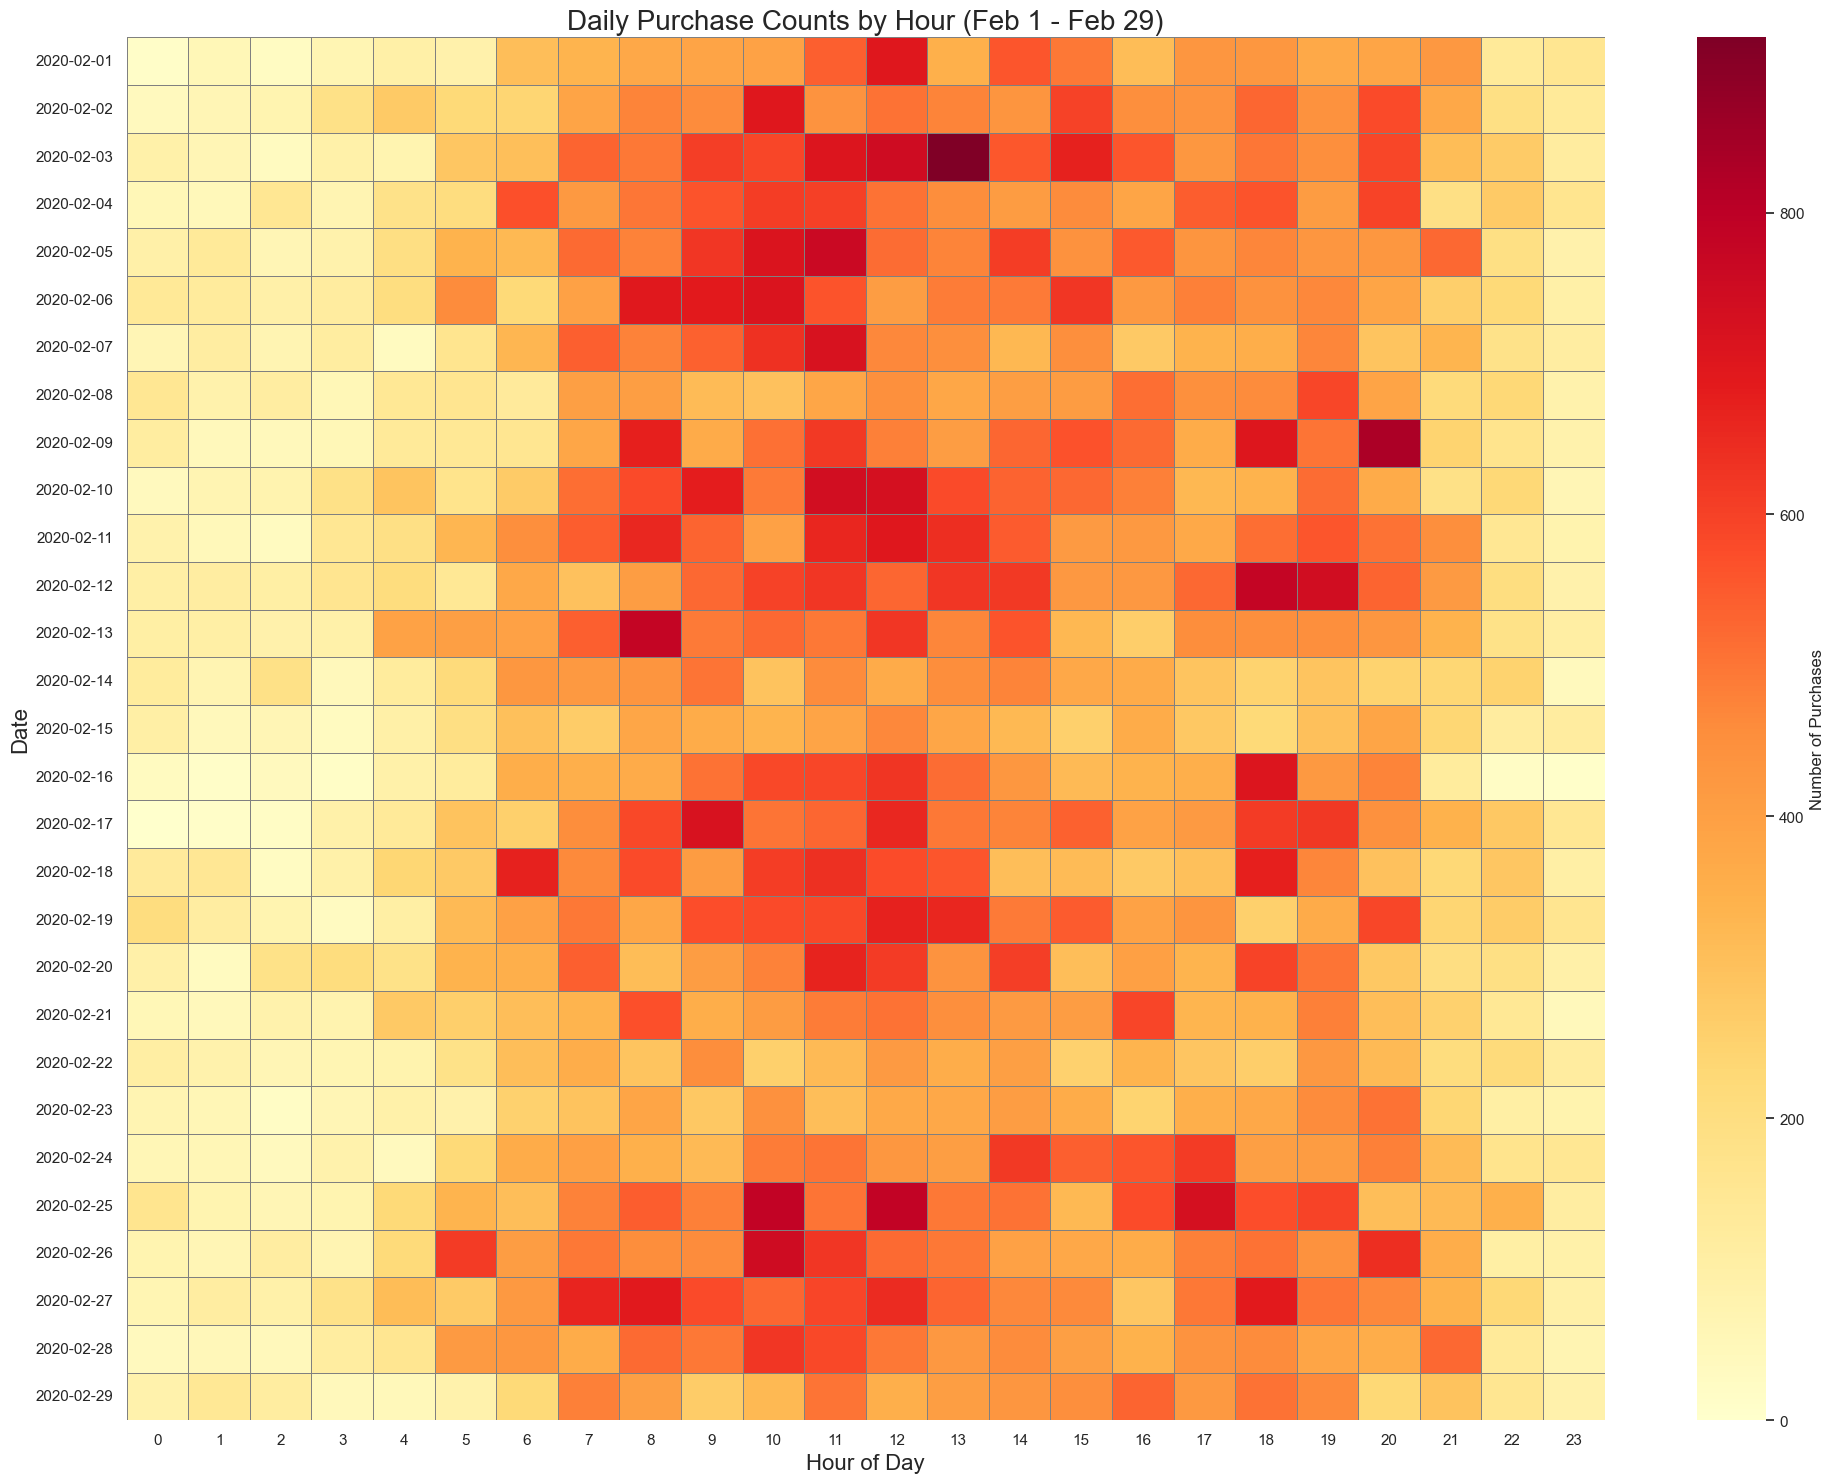

In [47]:
# event_time을 datetime 형식으로 변환
eComFeb['event_time'] = pd.to_datetime(eComFeb['event_time'], utc=True)

# 'purchase'인 행 필터링 후 복사하여 새로운 DataFrame 생성
purchases = eComFeb[eComFeb['event_type'] == 'purchase'].copy()

# 날짜와 시간 추출
purchases['date'] = purchases['event_time'].dt.date
purchases['hour'] = purchases['event_time'].dt.hour

# 날짜별 시간대 구매 수 집계
purchase_counts = purchases.groupby(['date', 'hour']).size().reset_index(name='count')

# 피벗 테이블 생성
pivot_table = purchase_counts.pivot(index='date', columns='hour', values='count').fillna(0)

# 시각화 스타일 설정
sns.set(style="white")

# 히트맵 생성
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=.5, linecolor='gray', cbar_kws={'label': 'Number of Purchases'})

# 그래프 제목 및 축 레이블 설정
plt.title('Daily Purchase Counts by Hour (Feb 1 - Feb 29)', fontsize=20)
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('Date', fontsize=16)

# x축 레이블 (시간대) 조정
plt.xticks(rotation=0)

# y축 레이블 (날짜) 조정
plt.yticks(rotation=0)

# 그래프 표시
plt.tight_layout()
plt.show()


In [50]:
import math

In [54]:
n = 9
for i in range(1, int(math.sqrt(n))+ 1):
    print(i)

1
2
3
